<a href="https://colab.research.google.com/github/thiagotheiry05/Disciplinas-da-Graduacao/blob/main/INTELIG%C3%8ANCIA%20ARTIFICIAL/Unidade%203/Quest%C3%A3o3_Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom


In [1]:
import numpy as np

data = np.array([[0.88, 0.99, 0.91, 1.1],
                 [0.9, 0.99, 0.93, 1.26],
                 [0.9, 0.98, 0.94, 1.24],
                 [0.87, 0.98, 0.97, 1.18],
                 [0.93, 0.93, 0.93, 1.2],
                 [0.89, 0.97, 0.92, 1.04],
                 [0.88, 0.87, 0.91, 1.41],
                 [0.81, 0.92, 0.8, 0.55],
                 [0.82, 0.92, 0.75, 1.05],
                 [0.85, 0.9, 0.64, 0.07],
                 [0.77, 0.85, 0.69, -1.36],
                 [0.71, 0.83, 0.72, 0.47],
                 [0.75, 0.83, 0.63, -0.87],
                 [0.7, 0.62, 0.6, 0.21],
                 [0.44, 0.58, 0.37, -1.36],
                 [0.47, 0.37, 0.45, -0.68],
                 [0.23, 0.33, 0.27, -1.26],
                 [0.34, 0.36, 0.51, -1.98],
                 [0.31, 0.35, 0.32, -0.55],
                 [0.24, 0.37, 0.36, 0.2],
                 [0.76, 0.8, 0.61, 0.39]])

countries = ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil', 'Paraguai', 'Egito', 'Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique', 'China']


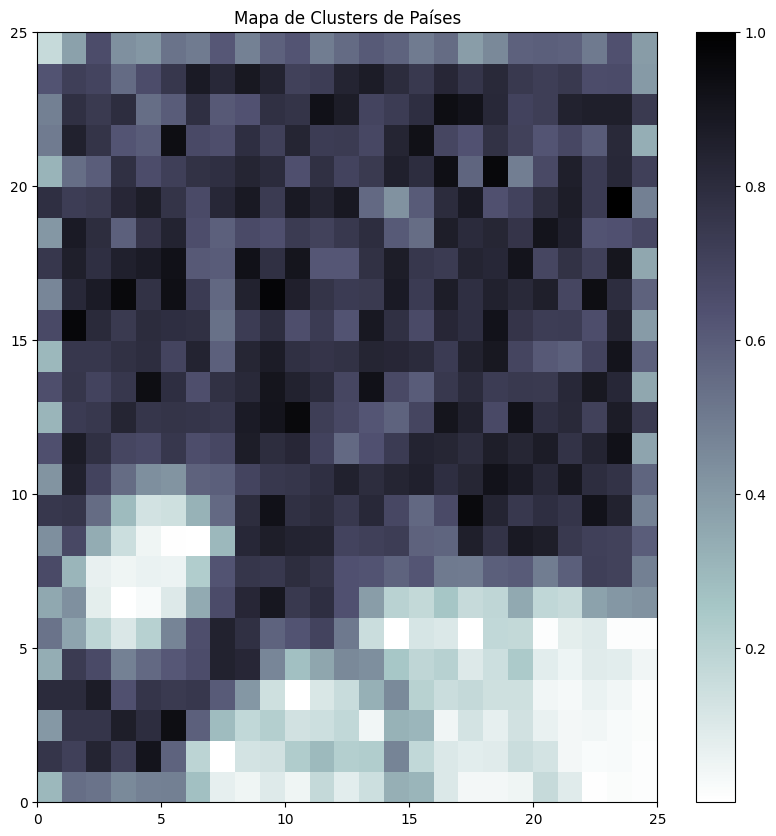

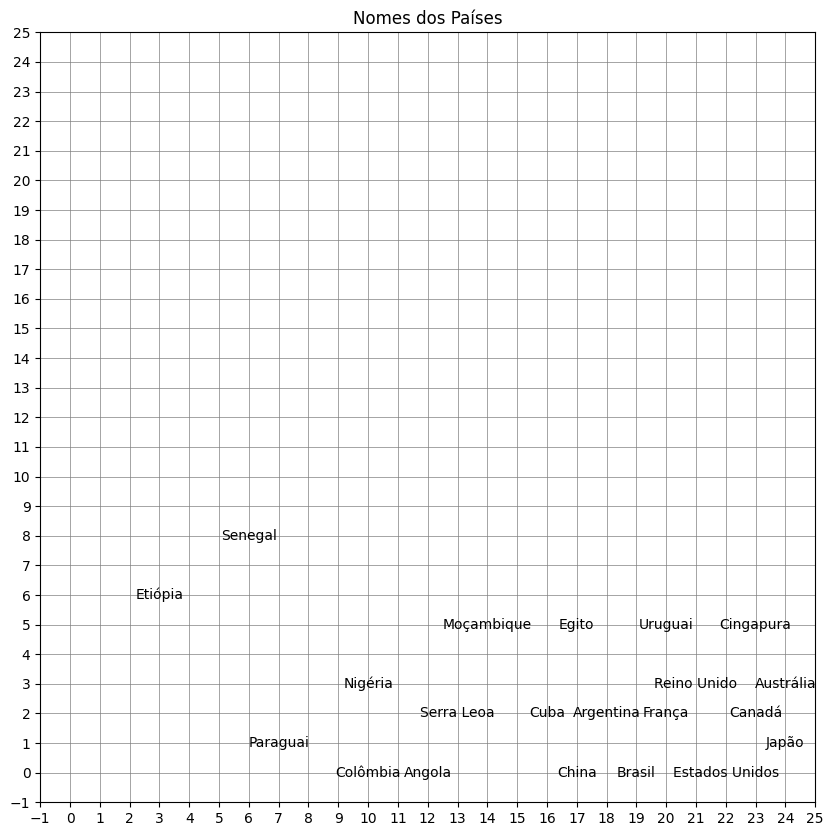

In [28]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt


som = MiniSom(25, 25, 4, sigma=1.0, learning_rate=0.5, topology='hexagonal', neighborhood_function='gaussian', random_seed=33)
som.train(data, 5000)

# Mapear os neurônios vencedores para os países
mapped_neurons = np.array([som.winner(datum) for datum in data])

# Criar um dicionário para armazenar os países de cada neurônio
neuron_countries = {}

# Preencher o dicionário com os países correspondentes a cada neurônio
for i, (x, y) in enumerate(mapped_neurons):
    if (x, y) not in neuron_countries:
        neuron_countries[(x, y)] = [countries[i]]
    else:
        neuron_countries[(x, y)].append(countries[i])

# Plotar o mapa de calor
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Cores representando as distâncias entre neurônios
plt.colorbar()
plt.title('Mapa de Clusters de Países')

# Plotar os nomes dos países no grid do SOM
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(-1, 26))
plt.yticks(np.arange(-1, 26))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
for (x, y), country_list in neuron_countries.items():
    country_names = '\n'.join(country_list)
    plt.text(x, y, country_names, ha='center', va='center')

plt.title('Nomes dos Países')
plt.show()

